This notebook contains the completed mid-term assigment for Dr. Mamoun Samaha's CS5100 Foundations of Artifical Intelligence. Here, two data sets are taken and a neural network works to differentiate between the images to see if it belongs to set a or set b. 

I followed the model designed by Aval Singh's tutorial, [Face Recognition With Tensorflow - Code Explanation](https://www.youtube.com/watch?v=-53SA35nPR8&list=PLkv7eJl39cXGOkDYGDUHKujjrhq9dOeMm&index=6&t=0s)

Notes are added for my own learning purposes.

Esteban Peralta
Northeastern University
March 2020 


***Import Libraries*
**

Key Take-Aways: 

* import os - the OS module provides python function to interact with the operating system 
* pandas - open source data analysis and manipulation tool 
* PILLOW - a Python Imaging Library that adds support for opening, manipulating, and saving different image files 
* [InputDataGenerator](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/) - Keras class that accepts input batch of images,randomly transforms it, and returns only the new, transformed data

In [1]:
import os 
import numpy as np
import pandas as pd 
import random 
import PIL 
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [2]:
#Preparing the dataset

base_dir = '../input/5100-midterm-data/Facial_Recog_Data/DatalfwTwoPeople'
seta = 'George_W_Bush'
setb = 'Colin_Powell'

#Each directory has its own subdirectores: train, validate and test
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# test_path = os.listdir(train_dir)
# print(test_path)

#Each of the three subdirectories has two directories: seta and setb which correspond to GWB or CP
#Here we setting the paths for the directories 
def prepare_data(base_dir, seta, setb):
    print(base_dir, seta, setb)
    
    #Here, path is path-like object representing a file system path and join
    #join() will concatenate various path componets with one directory separator
    seta_train_dir = os.path.join(train_dir, seta)
    setb_train_dir = os.path.join(train_dir, setb)
    
    seta_valid_dir = os.path.join(validation_dir, seta)
    setb_valid_dir = os.path.join(validation_dir, setb)
    
    seta_train_fnames = os.listdir(seta_train_dir)
    setb_train_fnames = os.listdir(setb_train_dir)
    
    return seta_train_dir,setb_train_dir,seta_valid_dir, setb_valid_dir, seta_train_fnames, setb_train_fnames
    
#assign variables to returned values from prepare_data(base_dir, seta, setb)
seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnames, setb_train_fnames = prepare_data(base_dir, seta, setb)

#Set test directories by joining the test_dir to include seta and setb 
seta_test_dir = os.path.join(test_dir,seta)
setb_test_dir = os.path.join(test_dir, setb)

#os.listdir() returns a list containing the names of the entries in the directory given by the path
test_fnames_seta = os.listdir(seta_test_dir)
test_fnames_setb = os.listdir(setb_test_dir)




../input/5100-midterm-data/Facial_Recog_Data/DatalfwTwoPeople George_W_Bush Colin_Powell


Image Augmentation works to create variations of the images that can improve the ability of the fit models to generalize what the NN learns in the model
    
    

1
2
3
4
5


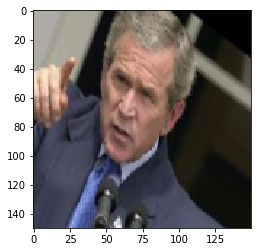

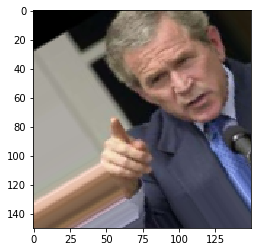

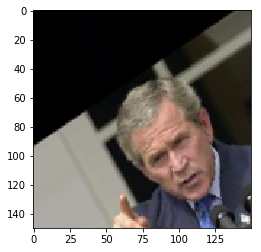

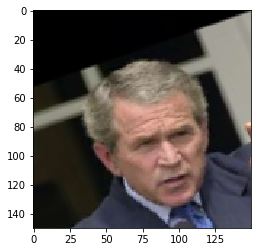

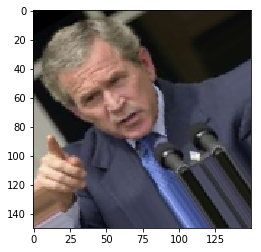

In [3]:
#This tensorflow function shifts and rotates the image
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
            
#Here is the plotting so user can see the augmentation 
img_path=os.path.join(seta_train_dir, seta_train_fnames[3])
img=load_img(img_path, target_size=(150,150))
x=img_to_array(img)
x=x.reshape((1,)+ x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
 plt.figure(i)
 imgplot = plt.imshow(array_to_img(batch[0]))
 i +=1
 print(i)
 if i % 5 == 0:
   break



In [4]:
#Convolution NN

from tensorflow.keras import layers
from tensorflow.keras import Model

#Define size of the input
img_input = layers.Input(shape=(150,150,3)) #3 dim as it is RGB

#2D cov 64 filters 
x = layers.Conv2D(64,3,activation ='relu')(img_input) #64 filters, 3x3 filter size 
x = layers.MaxPooling2D(2)(x) #stride is 2

#2D Convolution Layer with 128 filters of dimension 3x3 and ReLU activation algorithms -- the most common in image recognition 
x = layers.Conv2D(128, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

#2D Convolution Layer with 256 filters of dimension 3x3 and ReLU activation algorithms
x = layers.Conv2D(256, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

#2D Convolution Layer with 512 filters of dimension 3x3 and ReLU activation algorithms
x=layers.Conv2D(512, 3, activation='relu')(x)
x=layers.MaxPooling2D(2)(x)

#2D Convolution Layer with 512 filters of dimension 3x3 and ReLU activation algorithms
x=layers.Conv2D(512, 3, activation='relu')(x)

#Flatten Layer 
x = layers.Flatten()(x)


#Fully Connected layers with ReLU activation funciton 
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)


#Dropout layer for optimization - used to optimize accuracy 
x = layers.Dropout(0.5)(x)

#Fully connected layers and Sigmoid Activation Function algorithm 
output = layers.Dense(1, activation='sigmoid')(x)


model = Model(img_input, output)



In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0     

In [6]:
#Using binary crossentropy as the loss function and Adam Optimizer as the optimizing function 
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])


Next, create a data generator to rescale all images by 1/255 and creating a train_generator and validation_generator with a binary classification 

In [7]:
#Creating a Data generator to rescale all images by 1/255 and creating a train_generator and validation_generator with a binary classification 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 20 using train_datagen generator 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size= 20,
                                                   class_mode= 'binary')


#Create Validation generator with images from the validation directory
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode= 'binary')


Found 407 images belonging to 2 classes.
Found 283 images belonging to 2 classes.


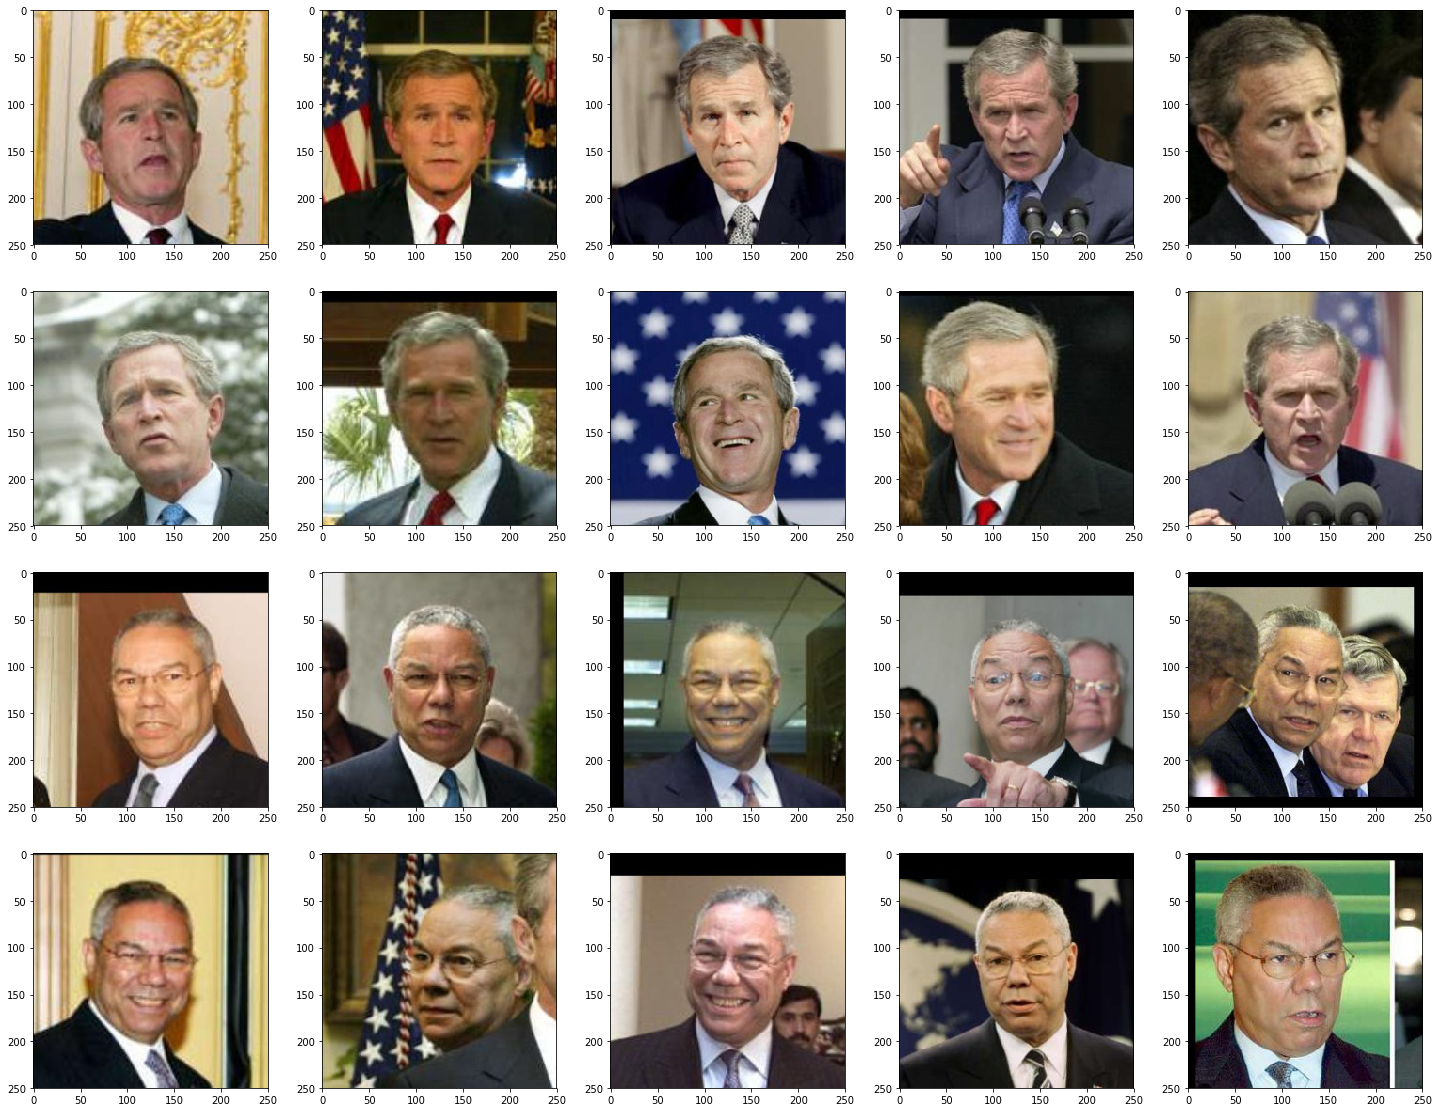

In [8]:
#Use the MatPlotLib to show the images. 

import matplotlib.image as mpimg

#4x4 grid 
nrows = 5
ncols = 5

pic_index = 0

#Set up matplotlib fig and fit to 5x5 pics 
fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*5)

pic_index += 10
next_seta_pix = [os.path.join(seta_train_dir, fname)
                 for fname in seta_train_fnames[pic_index-10:pic_index]]

next_setb_pix = [os.path.join(setb_train_dir, fname)
                 for fname in setb_train_fnames[pic_index-10:pic_index]]

for i, img_path in enumerate(next_seta_pix + next_setb_pix):
    #Set up subplot 
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis = ('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()
                



Training the model. Notes:

* Verbose: Shows more 'wordy' information for the task. In this case, for machine learning, by setting verbose to a higher number ( 2 vs 1 ), you may see more information about the tree building process.

In [9]:
#Train the model 
mymodel = model.fit_generator(
            train_generator, 
            steps_per_epoch=4,
            epochs=4,
            validation_data= validation_generator,
            validation_steps = 4,
            verbose=2)

Train for 4 steps, validate for 4 steps
Epoch 1/4
4/4 - 12s - loss: 1.4403 - acc: 0.5750 - val_loss: 0.7948 - val_acc: 0.4375
Epoch 2/4
4/4 - 10s - loss: 0.5029 - acc: 0.8500 - val_loss: 0.9527 - val_acc: 0.4375
Epoch 3/4
4/4 - 10s - loss: 0.4379 - acc: 0.8500 - val_loss: 0.9899 - val_acc: 0.4375
Epoch 4/4
4/4 - 9s - loss: 0.4958 - acc: 0.8657 - val_loss: 1.0186 - val_acc: 0.4375


Text(0.5, 1.0, 'Training and validation loss')

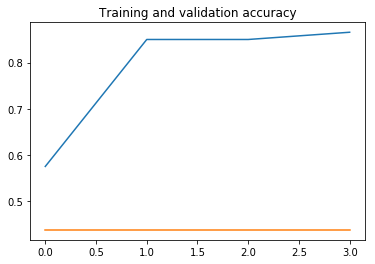

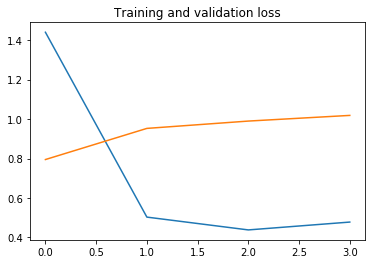

In [10]:
#Accuracy results for each training and validation epoch 
acc = mymodel.history['acc']
val_acc = mymodel.history['val_acc']

#Loss results for each each 
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs = range(len(acc))

#Plotting accuracy for each training and vaildation epoch 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()


#Plot loss for each 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

(1, 150, 150, 3)


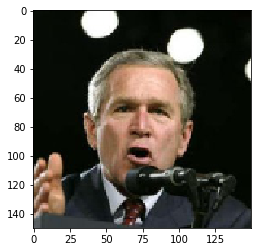

In [11]:
#Testing the model on a random image from seta
train_img = random.choice(seta_train_fnames)
train_img_path = os.path.join(seta_train_dir, train_img)
train_img = load_img(train_img_path, target_size= (150,150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)


In [12]:
model.predict(train_img)

array([[1.]], dtype=float32)

(1, 150, 150, 3)


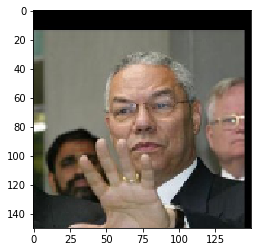

In [13]:
#Testing the model on a random image from setb
train_img = random.choice(setb_train_fnames)
train_img_path = os.path.join(setb_train_dir, train_img)
train_img = load_img(train_img_path, target_size= (150,150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)


In [14]:
model.predict(train_img)

array([[1.]], dtype=float32)